In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
SampleSubmission=pd.read_csv("SampleSubmission.csv")

In [4]:
SampleSubmission.shape

(3532, 2)

In [5]:
train.isnull()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,False,False,False,True,False,False,False,False,False,False,False,False,False
4986,False,False,False,True,False,False,False,False,False,False,False,False,False
4987,False,False,False,False,False,False,False,False,False,True,False,False,False
4988,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train.isnull().sum()

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

In [7]:
per_missing_val = train.isnull().sum()* 100 / len(train)
per_missing_val

Item_ID                 0.000000
Store_ID                0.000000
Item_Store_ID           0.000000
Item_Weight            16.072144
Item_Sugar_Content      0.000000
Item_Visibility         0.000000
Item_Type               0.000000
Item_Price              0.000000
Store_Start_Year        0.000000
Store_Size             29.058116
Store_Location_Type     0.000000
Store_Type              0.000000
Item_Store_Returns      0.000000
dtype: float64

In [8]:
train.duplicated().any()

False

In [9]:
train['Item_Weight']

0       11.60
1       11.60
2       11.60
3       11.60
4       11.60
        ...  
4985      NaN
4986      NaN
4987    14.65
4988    14.65
4989    14.65
Name: Item_Weight, Length: 4990, dtype: float64

In [10]:
mean_weight = train['Item_Weight'].mean()
median_weight =train['Item_Weight'].median()

In [11]:
print(mean_weight)
print(median_weight)

12.90883834765998
12.6


In [12]:
train['Item_Weight_mean'] =train['Item_Weight'].fillna(mean_weight)
train['Item_Weight_median'] = train['Item_Weight'].fillna(median_weight)

In [13]:
train.sample(5)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,Item_Weight_mean,Item_Weight_median
4528,NCN55,BABATUNJI045,NCN55_BABATUNJI045,14.6,Low Sugar,0.059611,Others,595.88,2009,NaN,Cluster 2,Supermarket Type1,5407.96,14.6,14.6
4056,NCB07,BABATUNJI049,NCB07_BABATUNJI049,19.2,Low Sugar,0.077628,Household,494.03,2006,Medium,Cluster 1,Supermarket Type1,7856.44,19.2,19.2
4505,NCN29,BABATUNJI010,NCN29_BABATUNJI010,15.2,Low Sugar,0.020280,Health and Hygiene,122.76,2005,NaN,Cluster 3,Grocery Store,486.03,15.2,15.2
3712,FDY10,BABATUNJI017,FDY10_BABATUNJI017,17.6,Low Sugar,0.049345,Snack Foods,288.54,2014,NaN,Cluster 2,Supermarket Type1,2862.94,17.6,17.6
275,DRI47,BABATUNJI046,DRI47_BABATUNJI046,14.7,Low Sugar,0.020920,Hard Drinks,359.53,2004,Small,Cluster 1,Supermarket Type1,7550.17,14.7,14.7


In [14]:
train['Item_Weight'].var()

22.120615052200215

In [15]:
train['Item_Weight_mean'].var()

18.564645264293503

In [16]:
train['Item_Weight_median'].var()

18.57751380889722

In [17]:
train['Item_Weight'].interpolate

<bound method NDFrame.interpolate of 0       11.60
1       11.60
2       11.60
3       11.60
4       11.60
        ...  
4985      NaN
4986      NaN
4987    14.65
4988    14.65
4989    14.65
Name: Item_Weight, Length: 4990, dtype: float64>

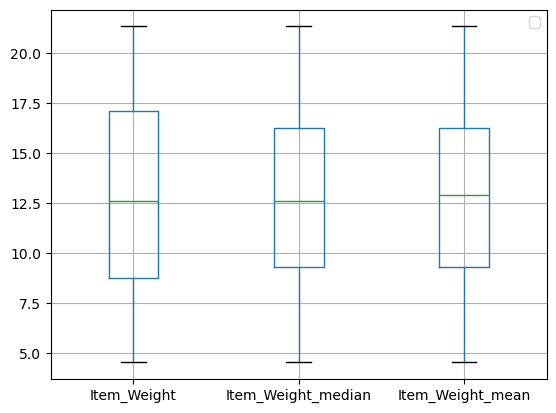

In [18]:
train[['Item_Weight','Item_Weight_median','Item_Weight_mean']].boxplot()
plt.legend()
plt.show()


In [19]:
train['Item_Weight_interpolate'] = train['Item_Weight'].interpolate(method="linear")

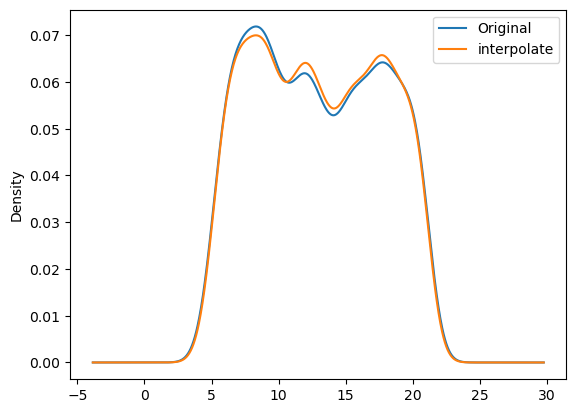

In [20]:
train['Item_Weight'].plot(kind = 'kde', label ='Original')
train['Item_Weight_interpolate'].plot(kind = 'kde', label ='interpolate')
plt.legend()
plt.show()

In [21]:
from sklearn.impute import KNNImputer

In [22]:
knn = KNNImputer(n_neighbors= 10, weights = "distance")

In [23]:
#train['knn_imputer']= knn.fit_transform(train(['Item_Weight'])).ravel()

In [24]:
train=train.drop(['Item_Weight_median','Item_Weight_mean'],axis=1)

In [26]:
#median_Weight = train['Item_Weight'].median()[0]

In [ ]:
train['Item_Weight'].fillna(median_Weight, inplace=True)
test['Item_Weight'].fillna(median_Weight, inplace=True)

In [ ]:
train.head()

In [ ]:
train.isnull().sum()

In [ ]:
train['Store_Size'].value_counts()

In [ ]:
train['Store_Type'].value_counts()

In [ ]:
#train.pivot_table(values='Store_Size',columns='Store_Type',aggfunc=(lambda x:x.mode()[0]))

In [ ]:
#mode_Store = train.pivot_table(values='Store_Size',columns='Store_Type',aggfunc=(lambda x:x.mode()[0]))

In [ ]:
#mode_Store

In [ ]:
common_size = train['Store_Size'].mode()[0]

In [ ]:
train['Store_Size'].fillna(common_size, inplace=True)
test['Store_Size'].fillna(common_size, inplace=True)


In [ ]:
missing_values = train['Store_Size'].isnull() 
missing_values

In [ ]:
train.isnull().sum() 

In [ ]:
train.columns

In [ ]:
train['Item_Sugar_Content'].value_counts()

In [ ]:
train['Item_Visibility'].value_counts()

In [ ]:
train['Item_Visibility'].replace(0,np.nan).interpolate(method ='linear')

In [ ]:
train['Item_Visibility_interpolate'] = train['Item_Visibility'].replace(0,np.nan).interpolate(method ='linear')

In [ ]:
train.head(1)

In [ ]:
train['Item_Visibility_interpolate'].value_counts()

In [ ]:
train['Item_Visibility'].plot(kind = 'kde', label ='Original')
train['Item_Visibility_interpolate'].plot(kind = 'kde',color = 'green', label ='Interpolate')
plt.legend()
plt.show()

In [ ]:
train=train.drop(['Item_Visibility'],axis=1)

In [ ]:
train.head(1)

In [ ]:
train['Item_Type'].value_counts()

In [ ]:
train['Item_ID'].value_counts()

In [ ]:
train['Item_ID']= train['Item_ID'].apply(lambda x: x[:2])

In [ ]:
train['Item_ID'].value_counts()

In [ ]:
train['Store_Start_Year'].value_counts()

In [ ]:
import datetime as dt

In [ ]:
current_year = dt.datetime.today().year

In [ ]:
current_year

In [ ]:
train['Store_age']=current_year - train['Store_Start_Year']

In [ ]:
train['Store_age'].head()

In [ ]:
train.head(1)

In [ ]:
train=train.drop(['Store_Start_Year'],axis=1)

In [ ]:
train.head(1)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
train_encoded = train.copy()
Cat_cols = train.select_dtypes(include =['object']).columns
for col in Cat_cols: 
    oe = OrdinalEncoder()
    train_encoded[col] = oe.fit_transform(train_encoded[[col]])
    print(oe.categories_)


In [ ]:
train_encoded.head()

In [ ]:
X = train_encoded.drop('Item_Store_Returns', axis = 1)
y = train_encoded['Item_Store_Returns']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
xg = XGBRegressor(n_samples=100,random_state =42)
scores = cross_val_score(xg, X,y, cv =5, scoring ="r2")
print(scores.mean())

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state =42)
scores = cross_val_score(rf, X,y, cv =5, scoring ="r2")
print(scores.mean())

In [ ]:
from lightgbm import LGBMRegressor, LGBMClassifier, Booster
init_func = LGBMRegressor

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
lg = LGBMRegressor(n_estimators=100,random_state =42)
scores = cross_val_score(lg, X,y, cv =5, scoring ="r2")
print(scores.mean())

In [ ]:
rf = RandomForestRegressor(n_estimators=100,random_state =42)
rf1 = rf.fit(X,y)
pd.DataFrame({
    'Feature':X.columns,
    'RFR_importance': rf1.feature_importances_
}).sort_values(by = 'RFR_importance',ascending = False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_data = RandomForestRegressor()
rf_data.fit(train_encoded,y)

In [ ]:
xg = XGBRegressor(n_samples=100,random_state =42)
xg1 = xg.fit(X,y)
pd.DataFrame({
    'Feature':X.columns,
    'XGBR_importance': xg1.feature_importances_
}).sort_values(by = 'XGBR_importance',ascending = False)

In [ ]:
xg = XGBRegressor(n_samples=100,random_state =42)
scores = cross_val_score(xg1,X.drop(['Item_Store_ID','Item_Type','Store_age','Item_Sugar_Content','Store_ID','Item_ID'],axis =1),y,cv=5,scoring ="r2")
print(scores.mean())

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state =42)
scores = cross_val_score(rf, X,y, cv =5, scoring ="r2")
print(scores.mean())

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

rmse

In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("Root Mean Square Error:", rmse)

In [ ]:
SampleSubmission.head()

In [ ]:
X_test = test.drop(['Item_Store_ID'], axis=1)

In [ ]:
test_predictions = model.predict(X)

In [ ]:
submission = train[['Item_Store_ID']].copy()
submission['Item_Store_Returns'] = test_predictions


In [ ]:
submission.head()

In [ ]:
submission.to_csv("Storereturns1.csv", index=False)